In [17]:
from fastbook import *

In [18]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path
path.ls()

(#2) [Path('training'),Path('testing')]

In [20]:
(path/"training").ls()

(#10) [Path('training/7'),Path('training/8'),Path('training/5'),Path('training/6'),Path('training/9'),Path('training/3'),Path('training/2'),Path('training/0'),Path('training/4'),Path('training/1')]

In [21]:
block = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        batch_tfms=aug_transforms(mult=2., do_flip=False))

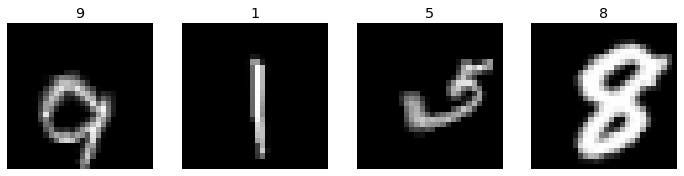

In [22]:
loaders = block.dataloaders(path/"training")
loaders.train.show_batch(max_n=4, nrows=1)

In [23]:
learn = cnn_learner(loaders, resnet34, metrics=accuracy)

SuggestedLRs(valley=0.001737800776027143)

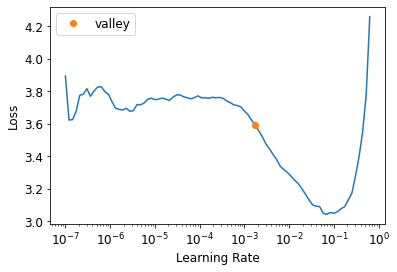

In [24]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.683763,0.274191,0.911667,01:37


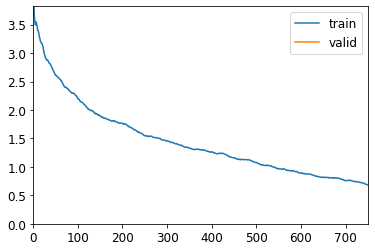

epoch,train_loss,valid_loss,accuracy,time
0,0.208780,0.070620,0.977583,01:59
1,0.164990,0.040495,0.986917,01:59
2,0.124375,0.046010,0.986583,01:59
3,0.103021,0.028191,0.991000,01:59
4,0.087570,0.038884,0.988583,02:01
5,0.075598,0.025558,0.992333,02:02
6,0.065600,0.024769,0.993000,02:07
7,0.051885,0.018818,0.994417,02:02
8,0.043071,0.018483,0.994833,01:59
9,0.030280,0.015918,0.995583,02:01


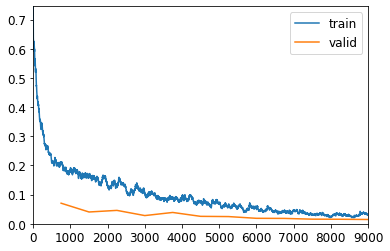

In [25]:
learn.fine_tune(12, base_lr=1e-2, cbs=[ShowGraphCallback()])